<center> <h1>The spiked matrix model with generative priors</h1> </center>

We provide this notebook to compare numerically performances of the AMP, LAMP and PCA algorithms to reconstruct $v^\star$ from observations either of the Wigner ($VV$) model:
$$ Y =\frac{(v^\star)^\intercal v^\star}{\sqrt{p}} +\sqrt{\Delta}\xi \,,$$
or the Wishart ($UV$) model:
$$ Y =\frac{(u^\star)^\intercal v^\star}{\sqrt{p}} +\sqrt{\Delta}\xi \,,$$
where the vector $v^\star$ comes from a generative prior:
$$v^\star=\varphi\left(\frac{1}{k} W z^\star \right)$$
Recall $v^\star \in\mathbb{R}^{p}, u^\star \in \mathbb{R}^{n}$ and $z^\star\in \mathbb{R}^{k}$.
We measure the performances of each algorithm by its mean square error. We define compression rates: $\beta=\frac{n}{p}$ and $\alpha = \frac{p}{k}$

<h2>Requirements</h2>

    - Python >= 3.6
    - numpy, scipy, sklearn, pickle

In [1]:
from Library.paths import *
from Library.check_requirements import *
from Library.import_library import *
from Library.import_library_plot import *
from Functions.functions_save_load import save_object, load_object
from Functions.launchers import run_AMP, run_SE, run_Spectral, run_all

<h2>Parameters</h2>

In [5]:
### model = ['VV', 'UV'] ###
model = 'VV'

### size k ###
k = 2000

### alpha=p/k ###
alpha = 1

### beta = n/p, beta=1 if model ='VV' ###
beta = 1

### non_linearity=['linear', 'sign', 'relu'] ###
non_linearity = 'linear' 

### Delta: noise variance ###
Delta = 0.5

### Average results ###
N_average = 5

<h2>Approximate Message Passing algorithm (AMP)</h2>

In [6]:
qv_AMP, MSEv_AMP = run_AMP(N=k, alpha=alpha, beta=beta, non_linearity=non_linearity, Delta=Delta,
                           seed=False, save=False, N_average=N_average, initialization_mode='planted', model=model, verbose=False)

#### START AMP ####
Model: VV
k: 2000 p: 2000 n: 2000
beta: 1 alpha: 1
non_linearity: linear
Delta: 0.5
Initialization: planted
m_v = 0.690 q_v = 0.704 MSE_v = 0.310
m_v = 0.705 q_v = 0.684 MSE_v = 0.295
m_v = 0.674 q_v = 0.668 MSE_v = 0.326
m_v = 0.730 q_v = 0.720 MSE_v = 0.270
m_v = 0.653 q_v = 0.650 MSE_v = 0.347
m_v avg = 0.690 q_v avg = 0.685 m_v std = 0.027 q_v std = 0.025
MSE_v avg = 0.310 MSE_v std = 0.027
#### END AMP #### 



<h2>State Evolution of AMP</h2>

In [7]:
qv_SE, MSEv_SE = run_SE(alpha=alpha, beta=beta,
                        non_linearity=non_linearity, Delta=Delta, save=False, model=model, verbose=False)

#### START SE ####
m_v = 0.681 q_v = 0.681 MSE_v = 0.319
#### END SE #### 



<h2>L-AMP spectral method vs PCA</h2>

In [11]:
qv_PCA, qv_lAMP, MSEv_PCA, MSEv_lAMP = run_Spectral(N=k, alpha=alpha, beta=beta, non_linearity=non_linearity, Delta=Delta,
                                                    seed=False, save=False, N_average=N_average, model=model, verbose=False)

#### START Spectral ####
Model: VV
k: 2000 p:2000 n:2000
beta: 1 alpha: 1
non_linearity: linear
Delta: 0.5
PCA: m_v = 0.724 q_v = 1.000 MSE_v = 0.551
lAMP: m_v = 0.834 q_v = 1.000 MSE_v = 0.332
PCA: m_v = 0.681 q_v = 1.000 MSE_v = 0.638
lAMP: m_v = 0.800 q_v = 1.000 MSE_v = 0.401
PCA: m_v = 0.727 q_v = 1.000 MSE_v = 0.547
lAMP: m_v = 0.845 q_v = 1.000 MSE_v = 0.311
PCA: m_v = 0.685 q_v = 1.000 MSE_v = 0.630
lAMP: m_v = 0.811 q_v = 1.000 MSE_v = 0.378
PCA: m_v = 0.725 q_v = 1.000 MSE_v = 0.550
lAMP: m_v = 0.836 q_v = 1.000 MSE_v = 0.327
PCA: m_v avg = 0.708 q_v avg = 1.000 m_v std = 0.021 q_v std = 0.000
lAMP: m_v avg = 0.825 q_v avg = 1.000 m_v std = 0.017 q_v std = 0.000
PCA: MSE_v avg = 0.583 MSE_v std = 0.042
lAMP: MSE_v avg = 0.350 MSE_v std = 0.034
#### END Spectral #### 



<h2>Let's compare: AMP vs LAMP vs PCA</h2>

In [12]:
print(f'AMP  MSEv: {MSEv_AMP:.3f}')
print(f'SE   MSEv: {MSEv_SE:.3f}')
print(f'lAMP MSEv: {MSEv_lAMP:.3f}')
print(f'PCA  MSEv: {MSEv_PCA:.3f}')

AMP  MSEv: 0.310
SE   MSEv: 0.319
lAMP MSEv: 0.350
PCA  MSEv: 0.583


# Plot

In [17]:
model = 'VV'
alpha = 1
non_linearity = 'linear'
N = 1000
N_average = 3
N_points = 30
file = f'Data/demo_{model}_alpha={alpha}_{non_linearity}_N={N}'
dict = {}

The cell below allows you to run and plot your own data. Careful it might use your cpus capacity for a few minutes.
If you prefer, you may ust load already saved data.

In [21]:
load_data = True
save_data = not load_data

In [22]:
if not load_data : 
    ### To run data ###
    tab_Delta = np.linspace(5e-2,3,N_points)
    tab_MSE_AMP, tab_MSE_SE, tab_MSE_PCA, tab_MSE_lAMP = [], [], [], []
    for Delta in tab_Delta:
        print(f'Delta = {Delta:.3f}')
        MSEv_AMP, MSEv_SE, MSEv_PCA, MSEv_lAMP = run_all(N=N, alpha=alpha, N_average = N_average, beta=beta, non_linearity=non_linearity, Delta=Delta,
                                                        seed=False, save=False, model=model, verbose=False)
        tab_MSE_AMP.append(MSEv_AMP)
        tab_MSE_SE.append(MSEv_SE)
        tab_MSE_PCA.append(MSEv_PCA)
        tab_MSE_lAMP.append(MSEv_lAMP)
    dict['tab_Delta'] = tab_Delta
    dict['tab_MSE_AMP'] = tab_MSE_AMP
    dict['tab_MSE_SE'] = tab_MSE_SE
    dict['tab_MSE_PCA'] = tab_MSE_PCA
    dict['tab_MSE_lAMP'] = tab_MSE_lAMP

    ### Save experiment ###
    save_object(dict,file) if save_data else 0
else : 
    ### Load previous saved experiment ###
    dict = load_object(file)

Object loaded: Data/demo_VV_alpha=1_linear_N=1000


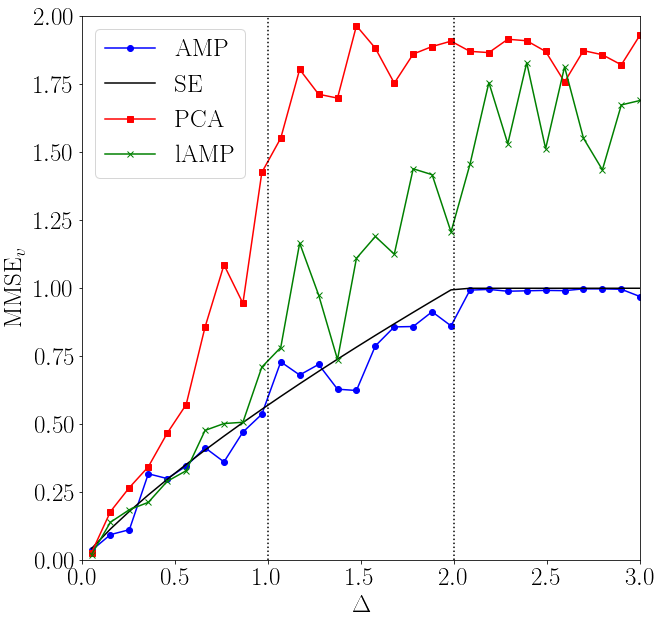

In [23]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(dict['tab_Delta'],dict['tab_MSE_AMP'],'-ob',label=r'AMP')
ax.plot(dict['tab_Delta'],dict['tab_MSE_SE'],'-k',label=r'SE')
ax.plot(dict['tab_Delta'],dict['tab_MSE_PCA'],'-sr',label=r'PCA')
ax.plot(dict['tab_Delta'],dict['tab_MSE_lAMP'],'-xg',label=r'lAMP')
ax.plot([1,1],[0,2],':k')
ax.plot([1+alpha,1+alpha],[0,2],':k')
ax.set_xlabel(r'$\Delta$',Fontsize=Fontsize)
ax.set_ylabel(r'$\textrm{MMSE}_v$',Fontsize=Fontsize)
ax.set_xlim([0,3])
ax.set_ylim([0,2])
plt.legend(loc='best',fontsize=Fontsize)
ax.tick_params(axis='both', which='major', labelsize=Fontsize)
plt.show()